# NLP analysis cutomor rewiews for electronic

In [1]:
# we will analysis data from amazon customers rewiews we will make sentiment analysis and wordcloud  and predict rating

In [19]:
!pip install nltk

In [2]:
#libraires

In [89]:
import pandas as pd
import os
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [4]:
#load data

In [6]:
import os
import pandas as pd

dataset = "Electronics_5.json"

if os.path.isfile(dataset):
    df = pd.read_json("Electronics_5.json", lines=True)
else:
    url = r"http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz"
    df = pd.read_json(url, compression='gzip', lines=True)

display(df.head(10))

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011"
5,A2JXAZZI9PHK9Z,0594451647,"Billy G. Noland ""Bill Noland""","[3, 3]",I am using this with a Nook HD+. It works as d...,5,HDMI Nook adapter cable,1388707200,"01 3, 2014"
6,A2P5U7BDKKT7FW,0594451647,Christian,"[0, 0]",The cable is very wobbly and sometimes disconn...,2,Cheap proprietary scam,1398556800,"04 27, 2014"
7,AAZ084UMH8VZ2,0594451647,"D. L. Brown ""A Knower Of Good Things""","[0, 0]",This adaptor is real easy to setup and use rig...,5,A Perfdect Nook HD+ hook up,1399161600,"05 4, 2014"
8,AEZ3CR6BKIROJ,0594451647,Mark Dietter,"[0, 0]",This adapter easily connects my Nook HD 7&#34;...,4,A nice easy to use accessory.,1405036800,"07 11, 2014"
9,A3BY5KCNQZXV5U,0594451647,Matenai,"[3, 3]",This product really works great but I found th...,5,This works great but read the details...,1390176000,"01 20, 2014"


In [7]:
df.to_csv("amazon.csv")
from google.colab import files
files.download("amazon.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
#we will take 400000 sample beacuse that number is enough for us

In [13]:
df=df.sample(400000)

In [14]:
#lets see a sample

In [15]:
sample_review = df["reviewText"].iloc[16885]
print(sample_review)

Very long and it works. I mean I'm using it to display on a 1080p TV from my desktop in the other room. What more could I ask?


In [39]:
df.isnull().sum()

reviewerID           0
asin                 0
reviewerName      5829
helpful              0
reviewText           0
overall              0
summary              0
unixReviewTime       0
reviewTime           0
dtype: int64

### NLP preprocesing

In [17]:
df['reviewText']=df['reviewText'].str.lower() #convert to lowercase
df['reviewText']=df['reviewText'].str.replace('[^\w\s]','') #remove punctuation
df['reviewText']=df['reviewText'].str.replace('\d+','') # destroy the numbers
df['reviewText']=df['reviewText'].str.replace('\n','').replace('\r','') # Removed new line and enter presses

<ipython-input-17-e796c156aa85>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviewText']=df['reviewText'].str.replace('[^\w\s]','') #remove punctuation
<ipython-input-17-e796c156aa85>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviewText']=df['reviewText'].str.replace('\d+','') # destroy the numbers


In [22]:
# nltk package

In [26]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [24]:
# Tokenize by words
df['reviewText'] = df['reviewText'].apply(lambda x: word_tokenize(x))

In [28]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()
# Lemmatize words
df['reviewText'] = df['reviewText'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

In [29]:
#check

In [30]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
319177,A1A0UEGAM7OJGK,B000UOC3QK,Mr. Rev,"[0, 0]","[maybe, a, software, problem, maybe, a, hardwa...",2,Would not stay connected,1305676800,"05 18, 2011"
179883,A3QL0RT8DISNGM,B000BWACX2,J. Lewis,"[0, 0]","[easy, to, use, silence, about, of, the, stati...",5,"compact, flexible, easy to use",1221436800,"09 15, 2008"
1128633,A3VWPDXLP7EFNO,B005FVNGRI,Anon,"[2, 2]","[my, old, gb, iphone, is, running, out, of, sp...",2,Not Me-Proof,1391558400,"02 5, 2014"
1295143,A38CZDNPCEB3WZ,B007FH1KX2,M. Palmqusit,"[1, 3]","[i, had, been, using, a, mixture, of, ii, flas...",5,Perfect for strobist's,1363651200,"03 19, 2013"
149946,A1TET60NZOM8HK,B0008EWSCQ,A Reader,"[7, 8]","[i, didnt, want, to, pay, for, the, monthly, u...",5,pays for itself with a year and works great,1233360000,"01 31, 2009"


In [31]:
# we remove stopwords on modeling step

#### Sentiment Analysis

In [32]:
# preapare labels

In [33]:
#checkpoint

In [34]:
data=df

In [35]:
# 4,5 is positive 1,2 is negaitive

In [41]:
data["Label"] = data["overall"].map({1: 0, 2: 0, 5: 1, 4: 1})

In [42]:
#reset indexes

In [43]:
data.reset_index(drop=True,inplace=True)

In [45]:
# mini visualization

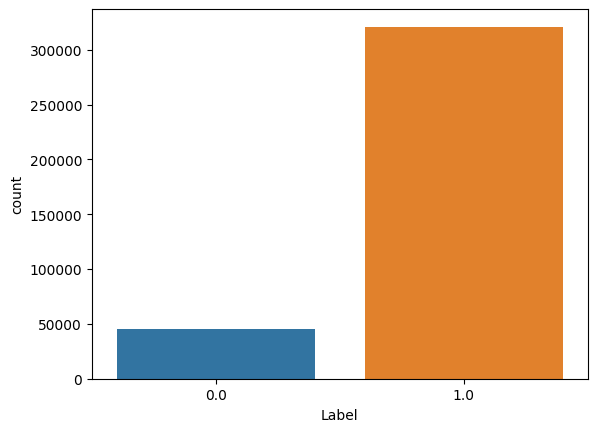

In [48]:
sns.countplot(x=data["Label"]);

In [50]:
#under sampling   (to 1)

In [55]:
# Assuming your DataFrame has a column named 'class' instead of 'label'
df_0 = data[data['Label'] == 0]  # MINORITY
df_1 = data[data['Label'] == 1]  # MAJORITY

# Downsample the majority class ('class' == 1) to balance with the minority class ('class' == 0)
df_downsampled = df_1.sample(n=len(df_0), random_state=42).reset_index(drop=True)

# Concatenate the downsampled majority class with the minority class
balanced_df = pd.concat([df_0, df_downsampled], ignore_index=True)

# Shuffle the DataFrame to randomize the order of rows
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)


In [57]:
#check

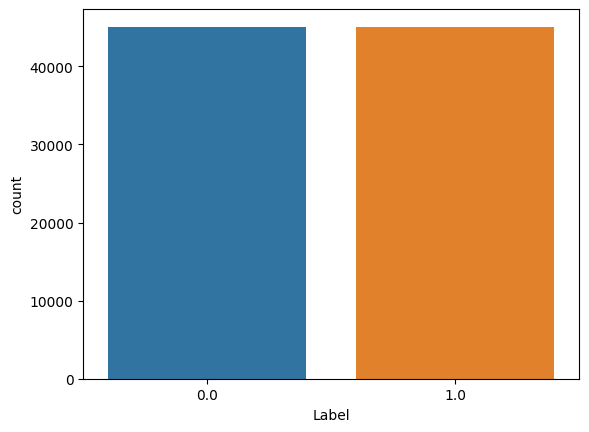

In [56]:
sns.countplot(x=balanced_df["Label"]);

In [58]:
data=balanced_df

In [59]:
# x y split

In [60]:
x=data["reviewText"]
y=data["Label"]

In [61]:
# vectorizing

In [65]:
# Convert the list of documents into a list of strings
documents_as_strings = [" ".join(document) for document in x]

# Create the CountVectorizer instance and fit_transform
vect = CountVectorizer(stop_words="english")
x_transformed = vect.fit_transform(documents_as_strings)

In [66]:
# train test split

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x_transformed,y,test_size=.20,random_state=42)

In [81]:
# model

In [82]:
from sklearn.svm import SVC
s=SVC()

In [83]:
#fiting

In [84]:
y_train = y_train.astype("int32")

In [85]:
model = s.fit(x_train, y_train)

In [86]:
#make predictions

In [87]:
predictions=model.predict(x_test)

In [90]:
# model accuracy

In [91]:
accuracy_score(predictions,y_test)

0.8547895057962172

In [92]:
#model save

In [93]:
import joblib
joblib.dump(model,"model_sentiment analysis.joblib")

['model_sentiment analysis.joblib']

#### WordCloud

In [94]:
#libraries

In [95]:
!pip install stylecloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.1/262.1 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.4/161.4 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.8/87.8 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stylecloud: filename=stylecloud-0.5.2-py3-none-any.whl size=259494 sha256=65e050838dacd6a63cd3044cdb61023c24a74e1f8da502db9fff0a65b6ddd5bb
  Stored in directory: /root/.cache/pip/wheels/aa/c8/27/9374f4fc7133015d902b5e2c75ad951edd57eb1ae948495915
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=49897805005153b0f43bcf653272e06e71e08759ca3f08f6e3e289c205442d8f
  Stored in directory: /root/.cache/pip/wheels/90/d4/

In [102]:
import stylecloud

In [103]:
#prepare data

In [104]:
text_data_1 = ' '.join(df_1['reviewText'].astype(str))
text_data_0 = ' '.join(df_0['reviewText'].astype(str))

In [ ]:
# Generate styled word cloud 1
stylecloud.gen_stylecloud(text_data_1, output_name="ch1.png")

In [ ]:
# Generate styled word cloud 2
stylecloud.gen_stylecloud(text_data_0, output_name="ch0.png")

In [1]:
#sources

-Zafer Acar Notes -[https://poe.com/chat/2rhcfi4djoj4u359vfr]